In [1]:
#
# Chapter 9, Example 1a
#

import numpy as np
import tensorflow as tf
from tensorflow.keras import Model, layers, models
import pylab

import os
if not os.path.isdir('figures'):
    print('creating the figures folder')
    os.makedirs('figures')

In [2]:
n_in = 2
n_hidden = 10
n_out = 1
n_steps = 16
n_seqs = 64

n_iters = 10000
lr = 0.001

seed = 10
np.random.seed(seed)
tf.random.set_seed(seed)
tf.keras.backend.set_floatx('float32')

In [3]:
# generate training data
x_train = np.random.rand(n_seqs,n_steps, n_in)
y_train = np.zeros([n_seqs,n_steps, n_out])

y_train[:,7:,0] = 5*x_train[:,6:-1, 0]*x_train[:,5:-2,1] - 2*x_train[:,:-7,0] + 3.5*x_train[:,2:-5,1]**2
y_train += 0.1*np.random.randn(n_seqs,n_steps, n_out)

x_train = tf.constant(x_train, dtype=tf.float32)
y_train = tf.constant(y_train, dtype=tf.float32)

In [4]:
class SeriesPredictor(Model):

    def __init__(self, input_dim, seq_size, num_steps, hidden_dim=10):
        super(SeriesPredictor, self).__init__()
        # Hyperparameters
        self.input_dim = input_dim
        self.seq_size = seq_size
        self.hidden_dim = hidden_dim
        self.num_steps = num_steps

        # Weight variables and RNN cell
        self.W_out = tf.Variable(tf.keras.backend.random_normal([hidden_dim, 1]))
        self.b_out = tf.Variable(tf.keras.backend.random_normal([1]))
        self.rnn = tf.keras.layers.RNN(
            tf.keras.layers.LSTMCell(self.hidden_dim),
            return_sequences=True)

    def call(self, x):
        # forward logic
        outputs = self.rnn(x)
        
        out_ = []
        for i, h in enumerate(tf.split(outputs, self.num_steps, axis = 1)):
            y_ = tf.matmul(tf.squeeze(h), self.W_out) + self.b_out
            out_.append(y_)
        
        out = tf.stack(out_, axis=1)
        return out

In [5]:
# Set an optimizer and loss function for training
optimizer = tf.optimizers.Adam(lr=0.001)
def get_loss(output, target):
    mse_loss = tf.reduce_mean(tf.square(output - target))
    return mse_loss

In [6]:
# Training function
def train_step(model, x, target):
    with tf.GradientTape() as tape:
        out = model(x)
        mse_loss = get_loss(out, target)
        gradients = tape.gradient(mse_loss, model.variables)
        gradient_variables = zip(gradients, model.variables)
        optimizer.apply_gradients(gradient_variables)
    return mse_loss

In [7]:
predictor = SeriesPredictor(input_dim=n_in, seq_size=n_seqs, num_steps=n_steps, hidden_dim=n_hidden)

In [8]:
loss = []
for i in range(n_iters):

    l = train_step(predictor, x_train, y_train)
    loss.append(l)

    if not i % 100:
        print('iter:%d, cost: %g'%(i, loss[i]))

iter:0, cost: 3.11486
iter:100, cost: 1.66383
iter:200, cost: 1.52581
iter:300, cost: 1.33165
iter:400, cost: 1.21619
iter:500, cost: 1.13901
iter:600, cost: 1.09857
iter:700, cost: 1.05347
iter:800, cost: 0.997203
iter:900, cost: 0.908717
iter:1000, cost: 0.750218
iter:1100, cost: 0.644813
iter:1200, cost: 0.605142
iter:1300, cost: 0.571605
iter:1400, cost: 0.533485
iter:1500, cost: 0.489477
iter:1600, cost: 0.444731
iter:1700, cost: 0.400533
iter:1800, cost: 0.353487
iter:1900, cost: 0.301263
iter:2000, cost: 0.259611
iter:2100, cost: 0.233711
iter:2200, cost: 0.216826
iter:2300, cost: 0.204411
iter:2400, cost: 0.194096
iter:2500, cost: 0.18502
iter:2600, cost: 0.176767
iter:2700, cost: 0.16913
iter:2800, cost: 0.161882
iter:2900, cost: 0.154909
iter:3000, cost: 0.148083
iter:3100, cost: 0.141462
iter:3200, cost: 0.135
iter:3300, cost: 0.128716
iter:3400, cost: 0.122682
iter:3500, cost: 0.116774
iter:3600, cost: 0.111072
iter:3700, cost: 0.105083
iter:3800, cost: 0.0988126
iter:3900,

In [10]:
pred = predictor(x_train)

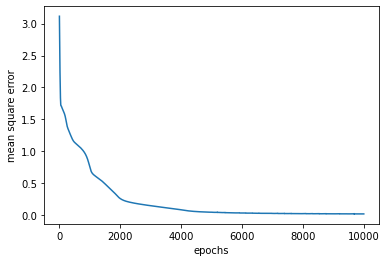

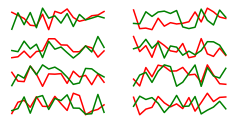

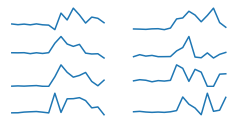

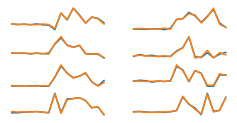

In [11]:
pylab.figure()
pylab.plot(range(n_iters), loss)
pylab.xlabel('epochs')
pylab.ylabel('mean square error')
pylab.savefig('./figures/9.1a_1.png')

pylab.figure(figsize=(4, 2))
for i in range(8):
    ax = pylab.subplot(4, 2, i+1)
    pylab.axis('off')
    ax.plot(range(n_steps), x_train[i,:,0],'r')
    ax.plot(range(n_steps), x_train[i,:,1],'g')
    pylab.savefig('./figures/9.1a_2.png')
    
pylab.figure(figsize=(4, 2))
for i in range(8):
    ax = pylab.subplot(4, 2, i+1)
    pylab.axis('off')
    ax.plot(range(n_steps), y_train[i,:,0])
    pylab.savefig('./figures/9.1a_3.png')

pylab.figure(figsize=(4, 2))
for i in range(8):
    ax = pylab.subplot(4, 2, i+1)
    pylab.axis('off')
    ax.plot(range(n_steps), y_train[i,:,0])
    ax.plot(range(n_steps), pred[i, :, 0])
    pylab.savefig('./figures/9.1a_4.png')


pylab.show()